**Name: XXXXXX**
**Student ID: pxxxxxx**

###**Import libraries**

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from mlxtend.frequent_patterns import association_rules, apriori
warnings.filterwarnings('ignore')

## **Data Consolidation**

**Import raw dataset from a CSV file into a dataframe**

In [19]:
df = pd.read_csv('bread basket.csv')
df

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
...,...,...,...,...,...
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend


**Show the number of records and columns as well as features** 

In [20]:
print("Number of records:", df.shape[0])
print("Number of columns:", df.shape[1])
print('-'*100)
print("The attributes of data :", df.columns.values)

Number of records: 20507
Number of columns: 5
----------------------------------------------------------------------------------------------------
The attributes of data : ['Transaction' 'Item' 'date_time' 'period_day' 'weekday_weekend']


**Show the details of the dataframe**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


## **Data Cleaning**

**Check duplicates**

In [22]:
df.duplicated().sum()

1620

**Drop duplicates**



In [23]:
df.drop_duplicates(inplace=True, ignore_index=True)
df

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,3,Hot chocolate,30-10-2016 10:07,morning,weekend
3,3,Jam,30-10-2016 10:07,morning,weekend
4,3,Cookies,30-10-2016 10:07,morning,weekend
...,...,...,...,...,...
18882,9682,Coffee,09-04-2017 14:32,afternoon,weekend
18883,9682,Tea,09-04-2017 14:32,afternoon,weekend
18884,9683,Coffee,09-04-2017 14:57,afternoon,weekend
18885,9683,Pastry,09-04-2017 14:57,afternoon,weekend


**Check missing values**

In [24]:
print('Is there any missing value?',df.isnull().values.any())
missing_percentage = (df.isnull().sum() / (df.shape[0])) * 100
missing_value_df = pd.DataFrame({'Count': df.isnull().sum(),'Percentage': missing_percentage})
missing_value_df[missing_value_df.Count != 0]

Is there any missing value? False


,Count,Percentage


## **Data Transformation**

In [25]:
# # replace all '-' in column 'date_time' with '/'
# df['date_time'] = df['date_time'].str.replace('-','/')
# Converting the 'date_time' column into the right format
df['date_time'] = pd.to_datetime(df['date_time'])
df

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,2016-10-30 09:58:00,morning,weekend
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
2,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend
3,3,Jam,2016-10-30 10:07:00,morning,weekend
4,3,Cookies,2016-10-30 10:07:00,morning,weekend
...,...,...,...,...,...
18882,9682,Coffee,2017-04-09 14:32:00,afternoon,weekend
18883,9682,Tea,2017-04-09 14:32:00,afternoon,weekend
18884,9683,Coffee,2017-04-09 14:57:00,afternoon,weekend
18885,9683,Pastry,2017-04-09 14:57:00,afternoon,weekend


In [26]:
# find number of unique months in the date_time column
print('Months in the date_time column:', df['date_time'].dt.month.unique())

Months in the date_time column: [10 11 12  1  2  3  4]


**Split date & time**

In [27]:
# Extracting date
df['date'] = df['date_time'].dt.date

#Extracting time
df['time'] = df['date_time'].dt.time

# Extracting month and replacing it with text
df['month'] = df['date_time'].dt.month
df['month'] = df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

# Extracting hour
df['hour'] = df['date_time'].dt.hour
# Replacing hours with text
hour_in_num = (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
hour_in_obj = ('1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15',
               '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24')
df['hour'] = df['hour'].replace(hour_in_num, hour_in_obj)

# Extracting weekday and replacing it with text
df['weekday'] = df['date_time'].dt.weekday
df['weekday'] = df['weekday'].replace((0,1,2,3,4,5,6), 
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

# Extracting year
df['year'] = df['date_time'].dt.year

# dropping date_time column
df.drop('date_time',axis=1,inplace=True)

# check unique values in month
df['month'].unique()

array(['October', 'November', 'December', 'January', 'February', 'March',
       'April'], dtype=object)

In [28]:
# cleaning the item column
df['Item'] = df['Item'].str.strip()
df['Item'] = df['Item'].str.lower()
df

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday,year
0,1,bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday,2016
1,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday,2016
2,3,hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday,2016
3,3,jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday,2016
4,3,cookies,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday,2016
...,...,...,...,...,...,...,...,...,...,...
18882,9682,coffee,afternoon,weekend,2017-04-09,14:32:00,April,14-15,Sunday,2017
18883,9682,tea,afternoon,weekend,2017-04-09,14:32:00,April,14-15,Sunday,2017
18884,9683,coffee,afternoon,weekend,2017-04-09,14:57:00,April,14-15,Sunday,2017
18885,9683,pastry,afternoon,weekend,2017-04-09,14:57:00,April,14-15,Sunday,2017


## **Data Exploration**

In [29]:
# Count of unique transactions
df['Transaction'].nunique()

9465

In [30]:
df.Item.value_counts()

Item
coffee            4528
bread             3097
tea               1350
cake               983
pastry             815
                  ... 
bacon                1
gift voucher         1
olum & polenta       1
raw bars             1
polenta              1
Name: count, Length: 94, dtype: int64

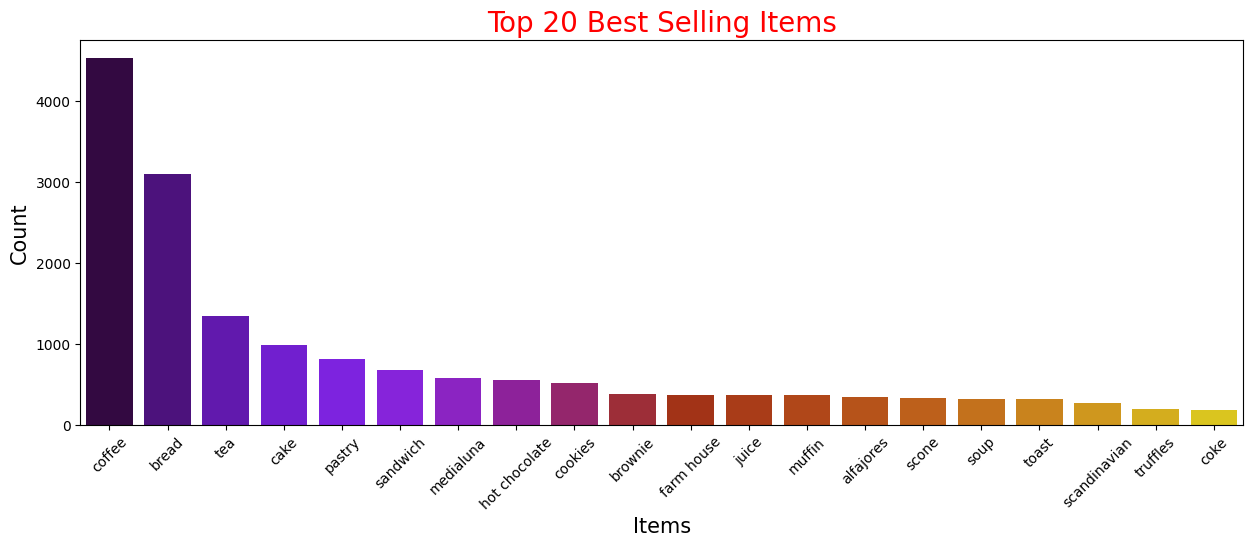

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.Item.value_counts().head(20).index, y = df.Item.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count', size = 15)
plt.title('Top 20 Best Selling Items', color = 'Red', size = 20)
plt.show()

In [32]:
# group the df by month and year
# create a column combining month and year
df['month_year'] = df['month'] + ' ' + df['year'].astype(str)
monthTran = df.groupby(['month_year']).size().reset_index(name='count')
monthTran

,month_year,count
0,April 2017,1086
1,December 2016,3076
2,February 2017,3421
3,January 2017,3128
4,March 2017,3658
5,November 2016,4172
6,October 2016,346


In [33]:
monthTran[:,"monthorder"] = [4,8,12,2,1,7,6,3,5,11,10,9]
df['month'].unique()

array(['October', 'November', 'December', 'January', 'February', 'March',
       'April'], dtype=object)

In [34]:
monthTran.sort_values("count",inplace=True)
monthTran

,month_year,count,monthorder
6,October 2016,346,6
0,April 2017,1086,4
1,December 2016,3076,8
3,January 2017,3128,2
2,February 2017,3421,12
4,March 2017,3658,1
5,November 2016,4172,7


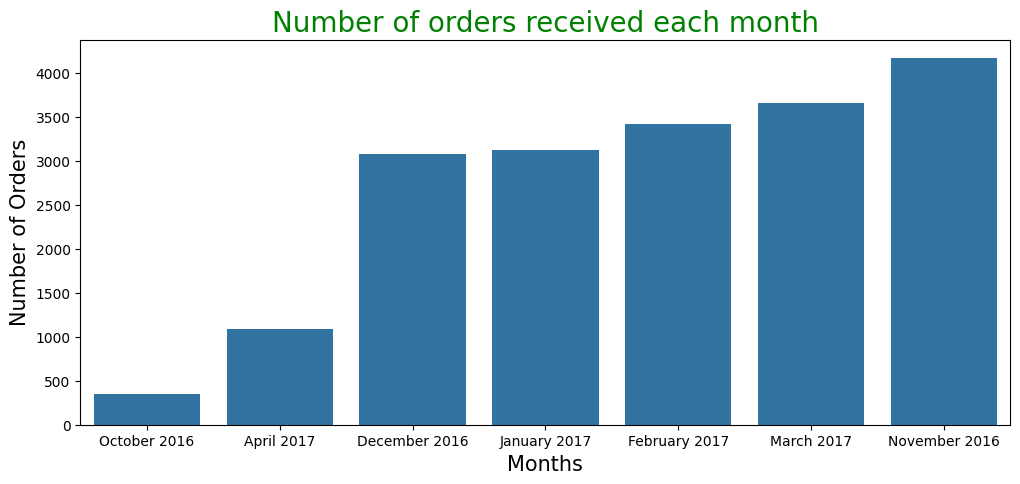

In [35]:
# rename column count to Transaction
monthTran.rename(columns = {'count':'Transaction'}, inplace = True)

plt.figure(figsize=(12,5))
sns.barplot(data = monthTran, x = "month_year", y = "Transaction")
plt.xlabel('Months', size = 15)
plt.ylabel('Number of Orders', size = 15)
plt.title('Number of orders received each month', color = 'green', size = 20)
plt.show()

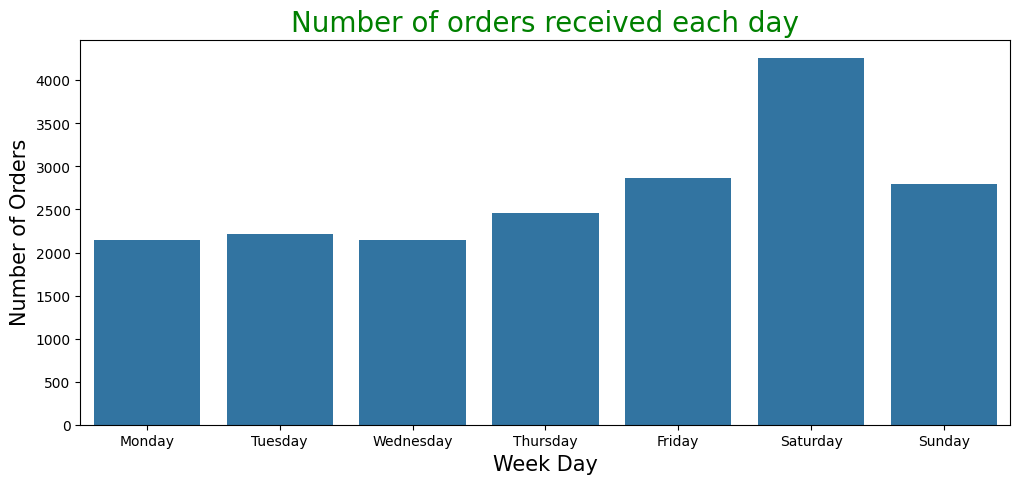

In [36]:
weekTran = df.groupby('weekday')['Transaction'].count().reset_index()
weekTran.loc[:,"weekorder"] = [4,0,5,6,3,1,2]
weekTran.sort_values("weekorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = weekTran, x = "weekday", y = "Transaction")
plt.xlabel('Week Day', size = 15)
plt.ylabel('Number of Orders', size = 15)
plt.title('Number of orders received each day', color = 'green', size = 20)
plt.show()


plt.show()

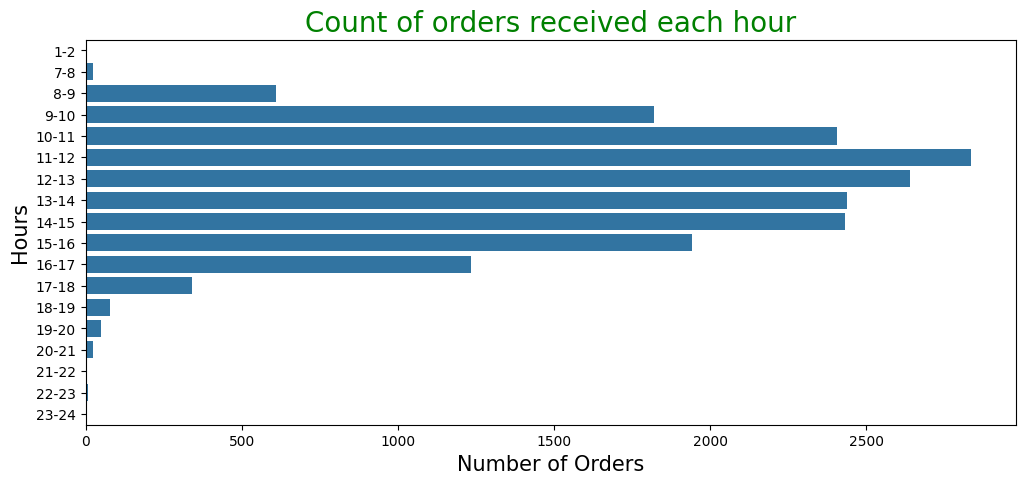

In [37]:
hourTran = df.groupby('hour')['Transaction'].count().reset_index()
hourTran.loc[:,"hourorder"] = [1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,7,8,9]
hourTran.sort_values("hourorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = hourTran, x = "Transaction", y = "hour")
plt.ylabel('Hours', size = 15)
plt.xlabel('Number of Orders', size = 15)
plt.title('Count of orders received each hour', color = 'green', size = 20)
plt.show()

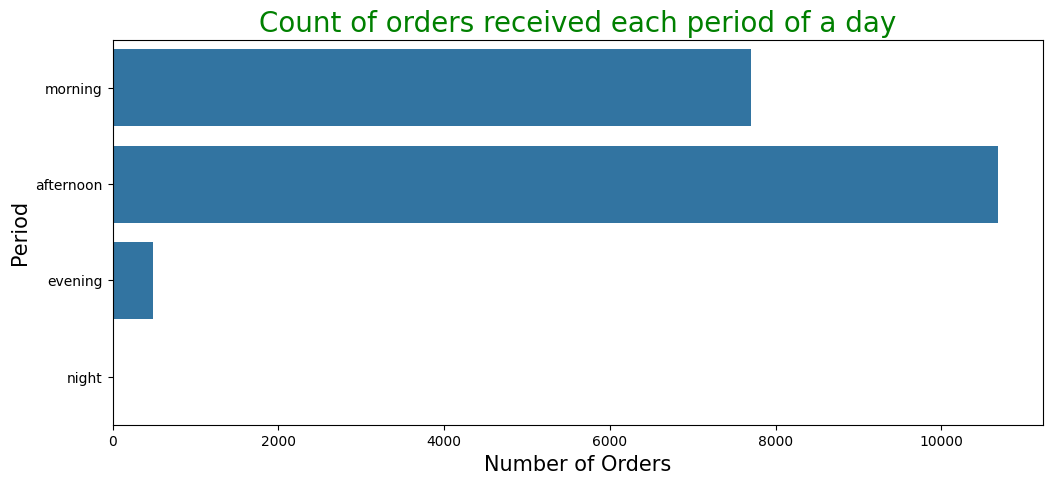

In [38]:
dayTran = df.groupby('period_day')['Transaction'].count().reset_index()
dayTran.loc[:,"dayorder"] = [1,2,0,4]
dayTran.sort_values("dayorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = dayTran, x = "Transaction", y = "period_day")
plt.ylabel('Period', size = 15)
plt.xlabel('Number of Orders', size = 15)
plt.title('Count of orders received each period of a day', color = 'green', size = 20)
plt.show()

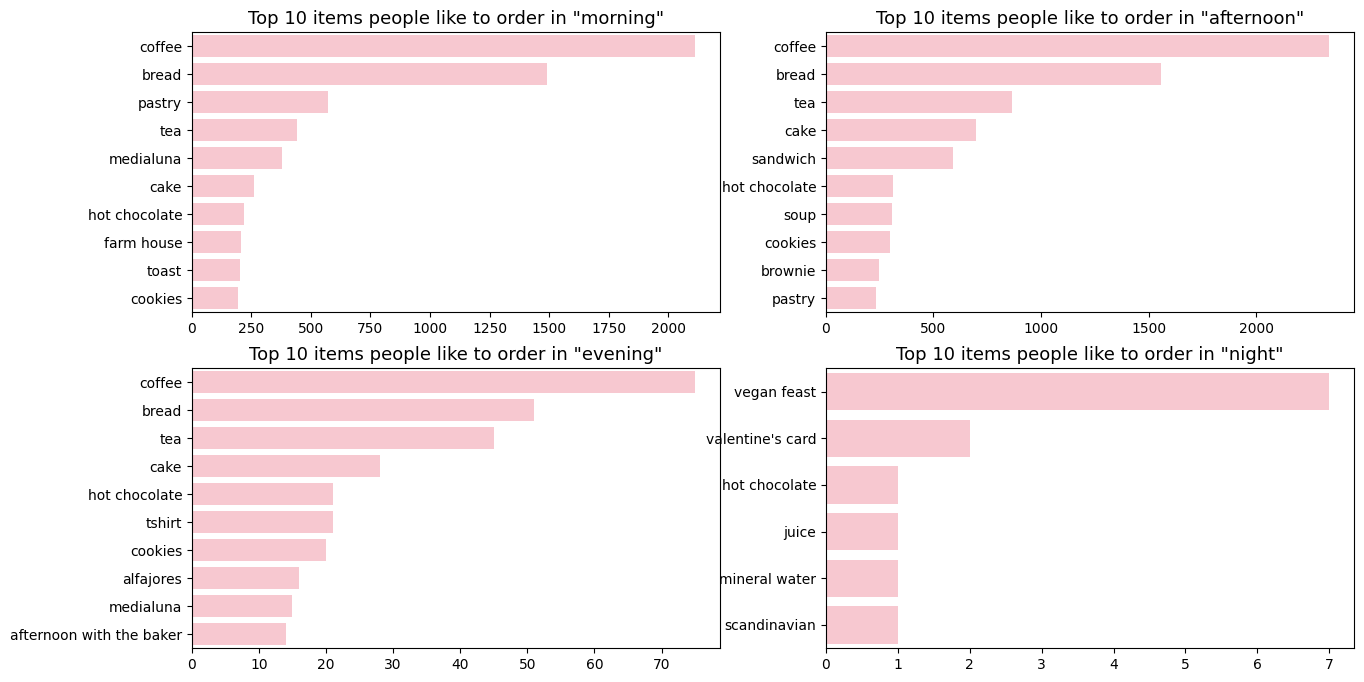

In [39]:
data = df.groupby(['period_day','Item'])['Transaction'].count().reset_index().sort_values(['period_day','Transaction'],ascending=False)
day = ['morning','afternoon','evening','night']

plt.figure(figsize=(15,8))
for i,j in enumerate(day):
    plt.subplot(2,2,i+1)
    df1 = data[data.period_day==j].head(10)
    sns.barplot(data=df1, y=df1.Item, x=df1.Transaction, color='pink')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Top 10 items people like to order in "{}"'.format(j), size=13)

plt.show()

## **Association Rules Mining**

In [40]:
transactions_str = df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Quantity')
transactions_str

,Transaction,Item,Quantity
0,1,bread,1
1,2,scandinavian,1
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
...,...,...,...
18882,9682,tacos/fajita,1
18883,9682,tea,1
18884,9683,coffee,1
18885,9683,pastry,1


In [41]:
# making a mxn matrice where m=transaction and n=items and each row represents whether the item was in the transaction or not (0 or 1 only)
df_matrix = transactions_str.pivot_table(index='Transaction', columns='Item', values='Quantity', aggfunc='sum').fillna(0)
df_matrix

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# using the 'apriori algorithm' with min_support=0.01 (e.g., 1% of 9465)
# It means the item should be present in at least 94 transaction out of 9465 transactions only when we considered that item in
# frequent itemset
frequent_items = apriori(df_matrix, min_support = 0.02,use_colnames = True)
frequent_items

,support,itemsets
0,0.036344,(alfajores)
1,0.327205,(bread)
2,0.040042,(brownie)
3,0.103856,(cake)
4,0.478394,(coffee)
5,0.054411,(cookies)
6,0.039197,(farm house)
7,0.058320,(hot chocolate)
8,0.038563,(juice)
9,0.061807,(medialuna)


In [43]:
# now making the rules from frequent itemset generated above

rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules.sort_values('lift', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(tea),(cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
5,(cake),(tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
19,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
18,(coffee),(toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699,0.615122
13,(coffee),(medialuna),0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667,0.305936
12,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
15,(coffee),(pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740,0.256084
14,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
11,(coffee),(juice),0.478394,0.038563,0.020602,0.043065,1.116750,0.002154,1.004705,0.200428
10,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738


In [44]:
# arranging the data from highest to lowest with respect to 'confidence'
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
19,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
12,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
14,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
10,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
16,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
3,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
6,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
8,(hot chocolate),(coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
0,(pastry),(bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
5,(cake),(tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538


**Question 1: What can you observe from the rules in above? Please briefly discuss THREE observations you find the most interesting (using point form).**

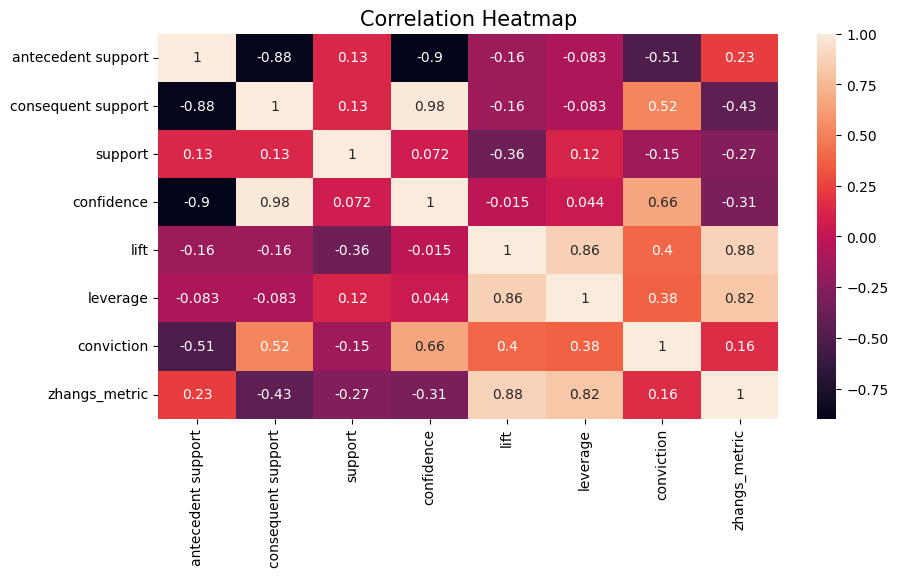

In [45]:
# create a heatmap to visualize the support, confidence, and lift of the itemsets
plt.figure(figsize=(10,5))
sns.heatmap(rules.corr( numeric_only= True), annot=True)
plt.title('Correlation Heatmap', size=15)
plt.show()

Answer 1:

- Observation 1: The "zhangs_metric" and 'lift' are positively correlated. As per formula of "zhangs_metric", zhangs_metric(A > B) = (confidence(A > B) - Confidence(A' > B))/ (Max(Confidence(A > B), Confidence(A' > B))), while Confidence(A > B) = Support(A > B)/Support(A). Lift(A > B) = Support(A > B)/(Support(A) * Support(B)). As per the formula, if the Support of A > B is higher, the zhangs_metric will be higher. Since lift and zhangs_metric have the same denominator, they are positively correlated.

- Observation 2: As per the heat map, the consequent support is negatively related to the antecedent support. This is logically correct as per the definition of "antecedent support" and "consequent support", if the antecedent item occur but not the consequent item, antecendent support will be higher and vice versa. 

- Observation 3: The correlation between "leverage" and "lift" is positively correlated. This can be explained by the formula of "leverage" and "lift".
"leverage" = "support" - "antecedent support" * "consequent support"
"lift" = "support" / ("antecedent support" * "consequent support")
As per the formula, if the "lift" is higher, the "leverage" will be higher and vice versa.



**Question 2: If you were the bakery manager, what would be your sales / marketing strategies? Please discuss TWO strategies that you find the most useful (using point form).**

In [46]:
# rank by the lift, create a new column which combine antecedents and consequents and then drop the duplicates
# drop the duplicates if they have the same support, condifence, lift and leverage
rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(tea),(cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
5,(cake),(tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
19,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
18,(coffee),(toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699,0.615122
13,(coffee),(medialuna),0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667,0.305936
12,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
15,(coffee),(pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740,0.256084
14,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
11,(coffee),(juice),0.478394,0.038563,0.020602,0.043065,1.116750,0.002154,1.004705,0.200428
10,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738


Answer 2: As per the association rules, the bakery manager can make a bundle sales strategy to increase the sales. For example, create bundle sales of "tea + cake", "coffee + toast", as per the lift, customer would like to buy "tea + cake" and "coffee + toast" together.

**Question 3: Given the minimum support of 2%, which rule should be the worst to the bakery while the items would not be bought together? Why?**

In [50]:
# exclude support which less than 0.02 in rules
rules_1 = rules[(rules['support'] > 0.02)]
# find rules with least lift
rules_1.sort_values('lift', ascending=True).head(1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(pastry),(bread),0.086107,0.327205,0.02916,0.33865,1.034977,0.000985,1.017305,0.03698


Answer 3: The worst rule to the bakery that antecedents and consequents will not be bought together is the rule with lowest lift. Hence, {'pastry'} -> {'bread'} would be the worst rule to the bakery.